In [1]:
import torch
from dataset import SatelliteDataset
import matplotlib.pyplot as plt
import numpy as np
from datautils import unprocess, create_img_from_classes

In [2]:
ds = SatelliteDataset("../../data/val")
loader = torch.utils.data.DataLoader(ds, 1)

In [3]:
def calc_class_split(classes, ax = None):
    b = torch.flatten(classes, 1)
    c = torch.argmax(b,0)
    split = []
    for cla in range(14):
        split.append(c[c == cla].size()[0] / c.size()[0])
    if ax:
        ax.bar(list(range(14)), split)
    else:
        plt.figure()
        plt.bar(list(range(14)),split)
    most_common_class = np.argmax(split)
    print("most common class", most_common_class)

most common class 2


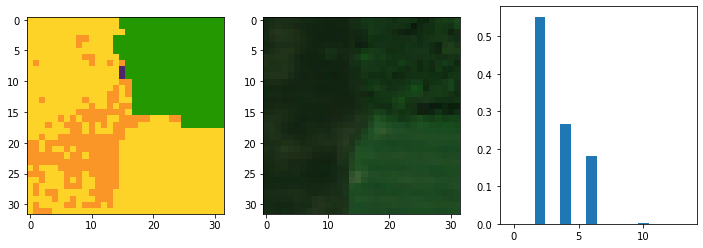

In [4]:
size = 32
for rgb_a, rgb_b, rgb_ab, lc_a, lc_b, lc_ab in loader:
    #calc_class_split(lc_b[0])
    #calc_class_split(lc_a[0])
    
    lc_aup = unprocess(lc_a, False)
    lc_aup = create_img_from_classes(lc_aup)
    rgb_a = unprocess(rgb_a)
    
    
    r_w = np.random.randint(256 - size)
    r_h = np.random.randint(256 - size)
    
    mlc = lc_aup[r_w:r_w+size, r_h:r_h + size, :]
    mrgb_a = rgb_a[r_w:r_w+size, r_h:r_h + size, :]
    
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].imshow(mlc)
    ax[1].imshow(mrgb_a)
    calc_class_split(lc_a[0,:,r_w:r_w+size, r_h:r_h + size], ax[2])
    
    break

In [2]:
model = torch.hub.load('pytorch/vision:v0.9.0', 'vgg16', pretrained=True)

Using cache found in C:\Users\hugih/.cache\torch\hub\pytorch_vision_v0.9.0


In [6]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
img = torch.randn((2, 3, 256, 256))

In [8]:
out = model(img)

In [9]:
out.shape

torch.Size([2, 1000])

In [10]:
for m in model.modules():
    print(m)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
#relu1_2 = torch.nn.Sequential(*model.features[:4])
#relu2_2 = torch.nn.Sequential(*model.features[:9])
relu3_3 = torch.nn.Sequential(*model.features[:16])
#relu4_3 = torch.nn.Sequential(*model.features[:23])

In [12]:
relu3_3(img).shape

torch.Size([2, 256, 64, 64])

In [14]:
#relu4_3

In [56]:
img1 = torch.randn((5,3, 256, 256))
img2 = torch.randn((5,3, 256, 256))
phi1 = relu3_3(img1)
phi2 = relu3_3(img2)

In [57]:
num_imgs, c, h, w = phi1.shape
psi1 = phi1.reshape((num_imgs, c, w*h))
psi2 = phi2.reshape((num_imgs, c, w*h))
gram1 = torch.matmul(psi1, torch.transpose(psi1, 1, 2)) / (c*h*w)
gram2 = torch.matmul(psi2, torch.transpose(psi2, 1, 2)) / (c*h*w)

In [73]:
torch.sum(torch.norm(gram1 - gram2, p = "fro",dim=(1,2))) / num_imgs

tensor(0.2461, grad_fn=<DivBackward0>)

In [55]:
gram1.shape

torch.Size([1, 256, 256])

In [33]:
a[a == False]

tensor([], dtype=torch.bool)

In [15]:
f = relu3_3(img)

In [42]:
b = torch.tensor([[1,2],[3,4]])
b1 = torch.tensor([[0,1], [2,1],[3,4]])

In [43]:
b- b1

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 0

In [77]:
def calc_style_loss(phi1, phi2):
    batch_size, c, h, w = phi1.shape
    psi1 = phi1.reshape((batch_size, c, w*h))
    psi2 = phi2.reshape((batch_size, c, w*h))
    
    gram1 = torch.matmul(psi1, torch.transpose(psi1, 1, 2)) / (c*h*w)
    gram2 = torch.matmul(psi2, torch.transpose(psi2, 1, 2)) / (c*h*w)
    # as described in johnson et al.
    return torch.sum(torch.norm(gram1 - gram2, p = "fro", dim=(1,2))) / batch_size

In [78]:
img1 = torch.randn((1, 3, 256, 256))
img2 = torch.randn((1, 3, 256, 256))
phi1 = relu3_3(img1)
phi2 = relu3_3(img2)
calc_style_loss(phi1, phi2)

tensor(0.2414, grad_fn=<DivBackward0>)

In [79]:
import torch.nn as nn

In [80]:
mse_fn = nn.MSELoss()
l1_fn = nn.L1Loss()
class_loss_fn = nn.CrossEntropyLoss()
adv_loss_fn = nn.MSELoss()

In [81]:
batch_size = 30

In [82]:
from tqdm import tqdm

In [83]:
bs = []
loss_names = ["style_loss", "mse", "l1", "class_loss", "adv_loss_ones", "adv_loss_zeros"]
losses = {}
for l in loss_names:
    losses[l] = []
    
for batch_size in tqdm(range(1, 32, 2)):
    img1 = torch.randn((batch_size, 3, 256, 256))
    img2 = torch.randn((batch_size, 3, 256, 256))
    phi1 = relu3_3(img1)
    phi2 = relu3_3(img2)
    style_loss = calc_style_loss(phi1, phi2)

    class1 = torch.zeros((batch_size, 14, 256, 256))
    class2 = torch.zeros((batch_size, 14, 256, 256))
    for i in range(256):
        for j in range(256):
            class1[:,np.random.randint(14), i, j]
            class2[:,np.random.randint(14), i, j]

    class2 = torch.argmax(class2, dim=1)
    mse = mse_fn(img1, img2)
    l1 = l1_fn(img1, img2)
    class_loss = class_loss_fn(class1, class2)

    d_real = torch.randn(batch_size, 16, 16)
    adv_loss_ones = adv_loss_fn(d_real, torch.ones_like(d_real))
    adv_loss_zeros = adv_loss_fn(d_real, torch.zeros_like(d_real))
    
    bs.append(batch_size)
    for l in loss_names:
        losses[l].append(eval(l).item())
    

100%|██████████| 16/16 [01:42<00:00,  6.44s/it]


In [84]:
import matplotlib.pyplot as plt

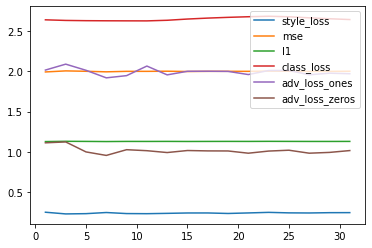

In [85]:
for l in loss_names:
    plt.plot(bs,losses[l], label=l)
plt.legend()

In [17]:
d_real = torch.randn(2, 16, 16)
print(adv_loss_fn(d_real, torch.zeros_like(d_real)))
print(adv_loss_fn(d_real, torch.ones_like(d_real)))

tensor(1.0164)
tensor(1.9284)


In [27]:
batch_size = 1
img1 = torch.randn((batch_size, 3, 256, 256))
img2 = torch.randn((batch_size, 3, 256, 256))
phi1 = relu3_3(img1)
phi2 = relu3_3(img2)
style_loss = calc_style_loss(phi1, phi2)
print(style_loss)

tensor(0.2595, grad_fn=<CopyBackwards>)
